<a href="https://colab.research.google.com/github/Pankaj-2003/Numerai_Models/blob/main/numerai_first_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
!pip install -q numerapi numpy pandas pyarrow matplotlib lightgbm scikit-learn cloudpickle scipy==1.10.1


In [3]:
%matplotlib inline

In [4]:
# Initialize NumerAPI - the official Python API client for Numerai
from numerapi import NumerAPI
napi = NumerAPI()
all_datasets = napi.list_datasets()

In [5]:
dataset_versions = list(set([i.split("/")[0] for i in all_datasets]))
dataset_versions

['v4.3', 'v4', 'v4.2', 'v4.1']

In [6]:
dataset_version = "v4.3"
current_version_files = [i for i in all_datasets if i.startswith(dataset_version)]
current_version_files

['v4.3/features.json',
 'v4.3/live_benchmark_models.parquet',
 'v4.3/live_example_preds.csv',
 'v4.3/live_example_preds.parquet',
 'v4.3/live_int8.parquet',
 'v4.3/meta_model.parquet',
 'v4.3/train_benchmark_models.parquet',
 'v4.3/train_int8.parquet',
 'v4.3/validation_benchmark_models.parquet',
 'v4.3/validation_example_preds.csv',
 'v4.3/validation_example_preds.parquet',
 'v4.3/validation_int8.parquet']

In [7]:
import json
napi.download_dataset(f"{dataset_version}/features.json");
feature_metadata = json.load(open(f"{dataset_version}/features.json"))


v4.3/features.json: 1.12MB [00:00, 2.96MB/s]                           


In [8]:
for i in feature_metadata.keys():
  print(f'{i}: {len(feature_metadata[i])}')


feature_stats: 2376
feature_sets: 17
targets: 41


In [26]:
features = ["small","medium","all"]
for i in features:
  print(f"{i}:{len(feature_metadata['feature_sets'][i])}")

small:42
medium:705
all:2376


In [9]:
# loading dataset
import pandas as pd
feature_sets = feature_metadata["feature_sets"]["medium"]
napi.download_dataset(f"{dataset_version}/train_int8.parquet");
train = pd.read_parquet(f"{dataset_version}/train_int8.parquet",columns = ["era","target"] + feature_sets)
train = train[train["era"].isin(train["era"].unique()[::4])]

v4.3/train_int8.parquet: 2.09GB [02:01, 17.2MB/s]                            


In [10]:
# exploring eras(took just first 10 to get a idea)
train.groupby(["era"]).size()

era
0001    2072
0002    2260
0003    2334
0004    2399
0005    2406
        ... 
0570    4804
0571    4811
0572    4793
0573    4793
0574    4801
Length: 574, dtype: int64

<Axes: title={'center': 'No. of rows per era'}, xlabel='era'>

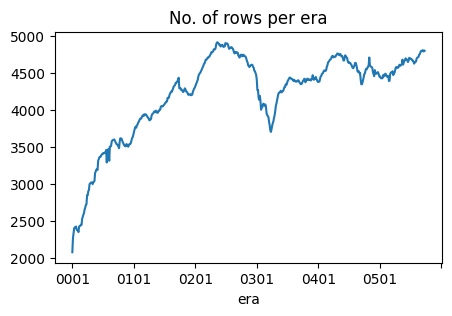

In [ ]:
# no of rows per era
train.groupby('era').size().plot(title = "No. of rows per era",figsize = (5,3),xlabel = "era")

<Axes: title={'center': 'Target'}, ylabel='Frequency'>

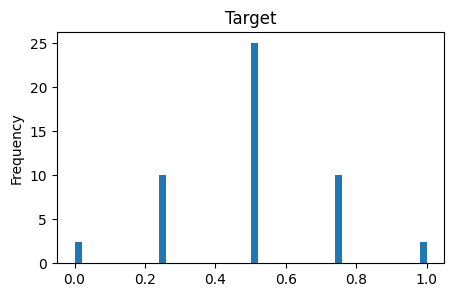

In [18]:
train["target"].plot(kind = 'hist', figsize = (5,3), bins = 50 , title = "Target",xlabel = "value", density = True)

<Axes: title={'center': 'missing data'}, ylabel='Frequency'>

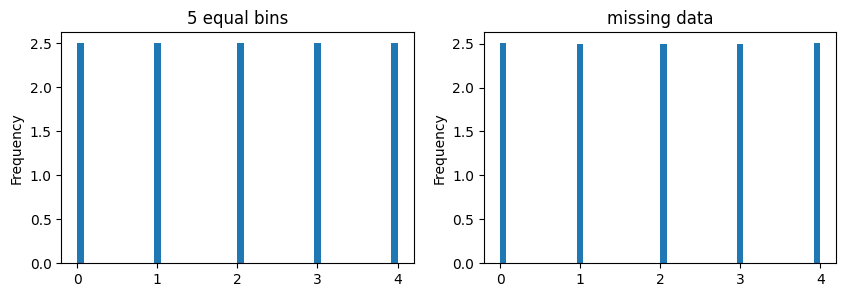

In [51]:
import matplotlib.pyplot as plt
fig ,(ax1 , ax2) = plt.subplots(1,2,figsize = (10,3))
first_era = train[train["era"] == train["era"].unique()[0]]
last_era  = train[train["era"] == train["era"].unique()[1]]
last_era[train.columns[2]].plot(kind = 'hist', density = True , title = "5 equal bins", bins = 50,ax = ax1)
first_era[train.columns[2]].plot(kind = 'hist', title = "missing data", density = True, bins = 50, ax = ax2)

In [ ]:
import lightgbm as lgb
X = train.drop_duplicates
model = lgb.LGBMRegressor(n_estimator = 2000 , learning_rate = 0.01 , max_depth = 5, num_leaves = 2**5-1 , colsample_bytree = 0.1)
model.fit(train[feature_metadata["feature_sets"]["medium"]],train["target"]);

,feature_abating_unadaptable_weakfish,feature_ablest_mauritanian_elding,feature_acclimatisable_unfeigned_maghreb,feature_accommodable_crinite_cleft,feature_accretive_sorrier_skedaddle,feature_acetose_periotic_coronation,feature_adam_incantational_winemaker,feature_additive_untrustworthy_hierologist,feature_adsorbed_blizzardy_burlesque,feature_affettuoso_taxidermic_greg,...,feature_witchy_orange_muley,feature_wombed_liberatory_malva,feature_won_stalwart_eisenstein,feature_wrathful_prolix_colotomy,feature_wrinkliest_unmaintainable_usk,feature_wrought_muckier_temporality,feature_yauld_antediluvial_subprefecture,feature_yelled_hysteretic_eath,feature_yoruban_unapplied_tawse,feature_zygodactyl_exponible_lathi
id,,,,,,,,,,,,,,,,,,,,,
n003bba8a98662e4,0,4,0,4,2,0,2,1,4,0,...,0,0,2,4,2,4,3,2,2,3
n003bee128c2fcfc,4,2,2,2,2,3,2,1,3,2,...,3,3,2,0,2,2,1,3,2,1
n0048ac83aff7194,4,4,2,0,2,0,2,4,1,3,...,0,1,2,0,2,3,2,1,2,2
n00691bec80d3e02,1,4,1,1,2,0,2,2,1,2,...,2,1,2,2,2,3,2,2,2,2
n00b8720a2fdc4f2,0,2,0,0,2,0,2,3,1,0,...,1,1,2,0,2,0,1,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
nffcc1dbdf2212e6,0,2,1,1,4,2,0,4,3,2,...,4,2,4,3,4,4,4,4,3,0
nffd71b7f6a128df,4,3,0,0,0,0,2,0,0,0,...,0,0,0,0,4,0,2,1,4,0
nffde3b371d67394,1,2,1,2,3,2,4,2,3,1,...,3,2,1,2,2,0,3,4,3,0
